In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import cv2
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import Normalizer
from tkinter import filedialog
from tkinter import Tk



Using TensorFlow backend.


In [2]:
# 모델 로드
model_path = 'C:\\Users\\admin\Desktop\\face_recognition_project\\models\\facenet_keras.h5'
model = load_model(model_path)

c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [13]:
pip install mtcnn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# load image from file
image = Image.open(filename)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)

NameError: name 'Image' is not defined

In [10]:
pip install Pillow


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN




1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)


KeyboardInterrupt: 

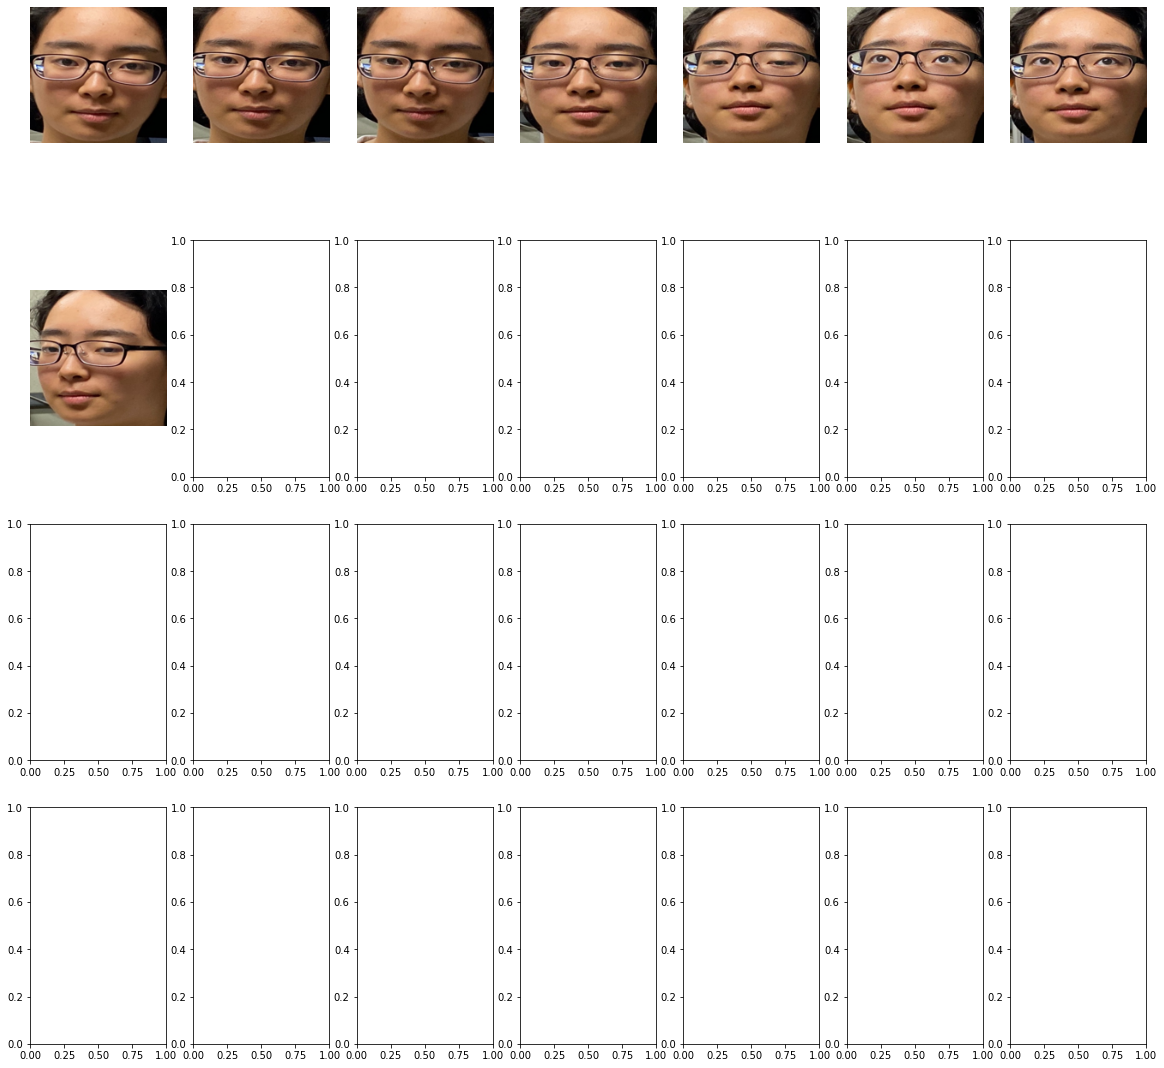

In [5]:
from os import listdir
from os.path import isfile, join
from PIL import Image
from numpy import asarray
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

# 주어진 사진에서 단일 얼굴을 추출하는 함수
def extract_face(filename, required_size=(160, 160)):
    try:
        # 파일에서 이미지 로드
        image = Image.open(filename)
        # 필요시 RGB로 변환 (이미지가 다른 모드일 수 있으므로)
        image = image.convert('RGB')
        # 이미지를 배열로 변환
        pixels = asarray(image)
        # 기본 가중치를 사용하여 얼굴 탐지기 생성
        detector = MTCNN()
        # 이미지에서 얼굴 감지
        results = detector.detect_faces(pixels)
        if len(results) == 0:
            return None
        # 첫 번째 얼굴에서 바운딩 박스 추출
        x1, y1, width, height = results[0]['box']
        # 바운딩 박스가 음수일 경우를 위한 오류 수정
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # 얼굴 추출
        face = pixels[y1:y2, x1:x2]
        # 모델 크기에 맞게 픽셀 크기 조정
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        return face_array
    except Exception as e:
        print(f"이미지를 로드할 수 없습니다: {filename}, 오류: {e}")
        return None

# 플롯할 폴더 지정
folder = "C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset\\train\\Hayden"
# 폴더 내의 파일 열거
file_list = [f for f in listdir(folder) if isfile(join(folder, f))]

# 플롯 설정 : 열의 수는 7로 고정하고, 행의 수는 파일 수에 따라 동적으로 결정됩니다.

num_images = len(file_list)
num_cols = 7
num_rows = (num_images // num_cols) + 1

# 플롯 사이즈 설정
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

i = 0
# 각 파일에 대해 얼굴 추출 및 플롯
for filename in file_list:
    path = join(folder, filename)
    face = extract_face(path)
    if face is None:
        print(f"얼굴을 감지하지 못했습니다: {path}")
        continue
    print(i + 1, face.shape)
    # 서브플롯에 얼굴 이미지 추가
    axes[i].axis('off')
    axes[i].imshow(face)
    i += 1

# 남은 서브플롯은 숨김 : 사용되지 않은 서브플롯은 숨겨서 빈 공간을 제거합니다.
for j in range(i, len(axes)):
    axes[j].axis('off')

# 플롯 표시
plt.tight_layout()
plt.show()


In [6]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# 주어진 사진에서 단일 얼굴을 추출하는 함수
def extract_face(filename, required_size=(160, 160)):
    # filename을 받아서 이미지 로드, required_size=(160, 160) 크기로 반환
    image = Image.open(filename)
    # 필요시 RGB로 변환 (이미지가 다른 모드일 수 있으므로)
    image = image.convert('RGB')
    # 이미지를 배열로 변환
    pixels = asarray(image)
    # 기본 가중치를 사용하여 얼굴 탐지기 생성
    detector = MTCNN()
    # MTCNN()를 사용해 이미지에서 얼굴 감지
    results = detector.detect_faces(pixels)
    # 첫 번째 얼굴에서 바운딩 박스 추출
    x1, y1, width, height = results[0]['box']
    # 바운딩 박스가 음수일 경우를 위한 절댓값을 씌운 오류 수정
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # 얼굴 추출
    face = pixels[y1:y2, x1:x2]
    # 모델 크기에 맞게 픽셀 크기 조정
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# 디렉토리 내 모든 이미지 로드 및 얼굴 추출 함수
def load_faces(directory):
    faces = list()
    # 파일 나열
    for filename in listdir(directory):
        # 경로 생성
        path = directory + filename
        # 얼굴 추출
        face = extract_face(path)
        # 얼굴 저장
        faces.append(face)
    return faces

# 데이터셋 로드 함수 (클래스별 하위 디렉토리를 포함)
def load_dataset(directory):
    X, y = list(), list()
    # 주어진 디렉토리 내의 하위 디렉토리(클래스별) 순회하여 모든 이미지 로드 / 클래스별 폴더 나열
    for subdir in listdir(directory):
        # 경로 생성
        path = directory + subdir + '/'
        # 디렉토리가 아닌 파일은 무시
        if not isdir(path):
            continue
        # 하위 디렉토리 내 모든 얼굴 로드
        faces = load_faces(path)
        # 라벨 생성
        labels = [subdir for _ in range(len(faces))]
        # 진행 상황 요약 출력
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # 데이터와 라벨 저장
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

# 훈련 데이터셋 로드
trainX, trainy = load_dataset("C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset\\train\\")
print(trainX.shape, trainy.shape)

# 테스트 데이터셋 로드
testX, testy = load_dataset("C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset\\val\\")

# 압축 형식으로 배열을 하나의 파일에 저장
savez_compressed('face_recognition_project.npz', trainX, trainy, testX, testy)


>loaded 27 examples for class: Hayden
>loaded 20 examples for class: Jaehyung
>loaded 22 examples for class: Sehun
>loaded 54 examples for class: Youngrok
(123, 160, 160, 3) (123,)
>loaded 4 examples for class: Hayden
>loaded 4 examples for class: Jaehyung
>loaded 4 examples for class: Sehun
>loaded 4 examples for class: Youngrok


In [7]:
from os import listdir
from os.path import isdir, join
from PIL import Image
from numpy import savez_compressed, asarray
from mtcnn.mtcnn import MTCNN

# MTCNN 탐지기를 전역으로 생성
detector = MTCNN()

# 주어진 사진에서 단일 얼굴을 추출하는 함수
def extract_face(filename, required_size=(160, 160)):
    try:
        # 파일에서 이미지 로드
        image = Image.open(filename)
        # 필요시 RGB로 변환 (이미지가 다른 모드일 수 있으므로)
        image = image.convert('RGB')
        # 이미지를 배열로 변환
        pixels = asarray(image)
        # 이미지에서 얼굴 감지
        results = detector.detect_faces(pixels)
        if len(results) == 0:
            return None
        # 첫 번째 얼굴에서 바운딩 박스 추출
        x1, y1, width, height = results[0]['box']
        # 바운딩 박스가 음수일 경우를 위한 오류 수정
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height
        # 얼굴 추출
        face = pixels[y1:y2, x1:x2]
        # 모델 크기에 맞게 픽셀 크기 조정
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        return face_array
    except Exception as e:
        print(f"이미지를 로드할 수 없습니다: {filename}, 오류: {e}")
        return None

# 디렉토리 내 모든 이미지 로드 및 얼굴 추출 함수
def load_faces(directory):
    faces = list()
    # 파일 나열
    for filename in listdir(directory):
        # 경로 생성
        path = join(directory, filename)
        # 얼굴 추출
        face = extract_face(path)
        if face is not None:
            # 얼굴 저장
            faces.append(face)
    return faces

# 데이터셋 로드 함수 (클래스별 하위 디렉토리를 포함)
def load_dataset(directory):
    X, y = list(), list()
    # 클래스별 폴더 나열
    for subdir in listdir(directory):
        # 경로 생성
        path = join(directory, subdir)
        # 디렉토리가 아닌 파일은 무시
        if not isdir(path):
            continue
        # 하위 디렉토리 내 모든 얼굴 로드
        faces = load_faces(path)
        # 라벨 생성
        labels = [subdir for _ in range(len(faces))]
        # 진행 상황 요약 출력
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # 데이터와 라벨 저장
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

# 훈련 데이터셋 로드
trainX, trainy = load_dataset('C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset\\train\\')
print(trainX.shape, trainy.shape)

# 테스트 데이터셋 로드
testX, testy = load_dataset('C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset\\val\\')

# 압축 형식으로 배열을 하나의 파일에 저장
savez_compressed('C:\\Users\\admin\\Desktop\\face_recognition_project\\face_recognition_project.npz', trainX, trainy, testX, testy)


KeyboardInterrupt: 

In [8]:
import numpy as np

# npz 파일 열기
data = np.load('C:\\Users\\admin\\Desktop\\face_recognition_project\\face_recognition_project.npz')

# 저장된 배열의 이름 확인
print(data.files)

# 배열 데이터에 접근
trainX = data['arr_0']
trainy = data['arr_1']
testX = data['arr_2']
testy = data['arr_3']

# 배열의 크기 확인
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

# 예시로 첫 번째 데이터 출력
print(trainX[0])
print(trainy[0])


['arr_0', 'arr_1', 'arr_2', 'arr_3']
(123, 160, 160, 3) (123,)
(16, 160, 160, 3) (16,)
[[[ 34  23  17]
  [ 40  31  25]
  [ 47  42  36]
  ...
  [  5   5   5]
  [  2   2   2]
  [  3   3   3]]

 [[ 27  16  10]
  [ 29  20  13]
  [ 28  22  14]
  ...
  [  6   6   6]
  [  4   4   4]
  [  3   3   3]]

 [[ 48  37  31]
  [ 60  51  44]
  [ 78  72  64]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 ...

 [[202 199 183]
  [199 195 179]
  [199 195 179]
  ...
  [ 51  60  78]
  [ 53  62  78]
  [ 49  57  73]]

 [[218 206 193]
  [220 208 194]
  [219 206 192]
  ...
  [ 51  59  76]
  [ 55  62  79]
  [ 52  59  76]]

 [[185 161 146]
  [188 164 150]
  [188 164 150]
  ...
  [ 52  58  71]
  [ 52  58  71]
  [ 53  60  73]]]
Hayden


In [10]:
# calculate a face embedding for each face in the dataset using facenet
from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model

# get the face embedding for one face 얼굴 임베딩을 계산하는 함수 정의 : 주어진 얼굴 이미지의 픽셀 데이터를 FaceNet 모델을 통해 임베딩 벡터로 변환
def get_embedding(model, face_pixels):
	# scale pixel values -> float32
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global) 전체 이미지의 평균과 표준 편차를 사용하여 픽셀 값을 표준화
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample 모델이 예측할 수 있도록 샘플의 차원을 확장
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding 모델을 사용하여 임베딩을 예측하고 결과 벡터를 반환
	yhat = model.predict(samples)
	return yhat[0]

# load the face dataset
data = load('face_recognition_project.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

# load the facenet model
model_path = 'C:\\Users\\admin\Desktop\\face_recognition_project\\models\\facenet_keras.h5'
model = load_model(model_path)

# convert each face in the train set to an embedding 훈련 데이터셋의 얼굴 임베딩 계산
# 훈련 데이터셋의 얼굴 이미지를 FaceNet을 사용해 임베딩 벡터로 변환하고 newTrainX 리스트에 추가, 배열로 변환
newTrainX = list()
for face_pixels in trainX:
	embedding = get_embedding(model, face_pixels)
	newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

# convert each face in the test set to an embedding 테스트 데이터셋에도 똑같이 적용
newTestX = list()
for face_pixels in testX:
	embedding = get_embedding(model, face_pixels)
	newTestX.append(embedding)
newTestX = asarray(newTestX)
print(newTestX.shape)

# save arrays to one file in compressed format 계산된 임베딩 벡터와 레이블을 압축된 npz 파일로 저장해 나중에 쉽게 로드하여 사용할 수 있게 함.
savez_compressed('face_recognition_project.npz', newTrainX, trainy, newTestX, testy)

Loaded:  (123, 160, 160, 3) (123,) (16, 160, 160, 3) (16,)


c:\Users\admin\anaconda3\envs\Face_Recognition\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


(123, 128)
(16, 128)


여기부터 시작

In [9]:
# load dataset 얼굴 임베딩 데이터세트를 로드
import numpy as np

data = np.load('face_recognition_project.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))


Dataset: train=123, test=16


In [10]:
# 데이터를 모델링 하기 전 준비 : 얼굴 임베딩 벡터를 정규화
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

ValueError: Found array with dim 4. Estimator expected <= 2.

Normalizer가 2차원 이하의 배열을 기대하지만, 입력 배열이 4차원이기 때문에 발생. 
얼굴 인식 프로젝트에서 사용하는 데이터셋은 일반적으로 4차원 (예: 이미지 개수, 이미지 높이, 이미지 너비, 채널 수). 
이를 해결하려면 각 이미지를 평탄화하여 2차원 배열로 변환해야 한다.

In [11]:
# Flatten the images
trainX = trainX.reshape((trainX.shape[0], -1))
testX = testX.reshape((testX.shape[0], -1))

# Normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=123, test=16


trainX.reshape((trainX.shape[0], -1))의 의미:
trainX.shape[0]:
trainX 배열의 첫 번째 차원의 크기, 즉 배열의 첫 번째 축에 따라 데이터의 개수를 의미합니다. 일반적으로 이것은 데이터셋에 있는 이미지의 수를 나타냅니다.
-1:
여기서 -1은 NumPy에서 자동으로 남은 차원의 크기를 계산하라는 지시입니다. 즉, 첫 번째 차원의 크기를 고정하고, 남은 모든 차원을 하나의 차원으로 평탄화하라는 뜻입니다.
예시:
만약 trainX가 (1000, 32, 32, 3)의 형태를 가지고 있다면:

trainX.shape[0]는 1000입니다. 즉, 1000개의 이미지가 있습니다.
reshape((1000, -1))에서 -1은 나머지 차원 (32, 32, 3)을 모두 하나의 벡터로 평탄화합니다.
따라서:

원래 (1000, 32, 32, 3) 형태의 배열이
(1000, 32 * 32 * 3) 또는 (1000, 3072) 형태의 배열로 변환됩니다.
이 과정에서 각 이미지는 (32, 32, 3)에서 (3072,)의 형태로 변환됩니다. 이를 통해 각 이미지를 하나의 벡터로 간주할 수 있고, Normalizer와 같은 sklearn의 도구에서 사용할 수 있는 2차원 배열이 됩니다.

In [12]:
#  scikit-learn의 LabelEncoder 클래스를 통해 각 이름에 대한 문자열 대상 변수를 정수로 변환해야 함.
# label encode targets 
# 문자열 형태의 클래스 레이블이 정수로 변환
# LabelEncoder는 fit 메서드를 사용하여 클래스 레이블을 학습하고, transform 메서드를 사용하여 실제 변환을 수행

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
out_encoder = LabelEncoder()

# Fit the encoder to the training labels
out_encoder.fit(trainy)

# Transform the training and testing labels
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

Dataset: train=123, test=16


정규화된 얼굴 임베딩 입력으로 작업할 때 SVM(선형 지원 벡터 머신)을 사용하는 것이 일반적.
얼굴 임베딩 벡터를 분리하는 데 매우 효과적이기 때문. 
scikit-learn의 SVC 클래스를 사용 하고 ' kernel ' 속성을 ' linear '로 설정하여 
선형 SVM을 훈련 데이터에 맞출 수 있고 나중에 예측을 할 때 확률을 원할 수도 있는데, 
확률은 'probability'을 ' True '로 설정하여 구성할 수 있다.

In [15]:
from sklearn.svm import SVC

# Create an SVC model with a linear kernel
model = SVC(kernel='linear')

# Fit the model on the training data
model.fit(trainX, trainy)

print('Model training completed.')

Model training completed.


In [16]:
# 적합 모델을 사용하여 학습 및 테스트 데이터 세트의 각 예에 대한 예측을 수행한 다음 분류 정확도를 계산
from sklearn.metrics import accuracy_score
# predict 
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)

# score
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Accuracy: train=90.244, test=81.250


데이터셋 크기
Training set: 123개
Test set: 16개
정확도
Training accuracy: 90.244% -> 훈련 데이터에서 잘 학습되고 있다.
Test accuracy: 81.250% -> 비교적 잘 작동, 어느 정도 일반화 능력이 있다.

훈련 정확도와 테스트 정확도 사이의 차이는 9% 정도로 overfitting의 신호일 수 있지만 매우 큰 차이는 아니므로 반드시 과적합이라고 단정할 수는 없다.
데이터셋의 크기가 123개의 훈련 샘플과 16개의 테스트 샘플로 작기 때문에 모델의 일반화 능력을 신뢰성 있게 평가하지 않는 것이 좋다.
정확도 외에도 F1-score, Precision, Recall 등의 다른 평가 지표를 고려해 모델의 성능을 종합적으로 평가하는 것이 좋다.


Predicted: Youngrok (97.479)
Expected: Youngrok


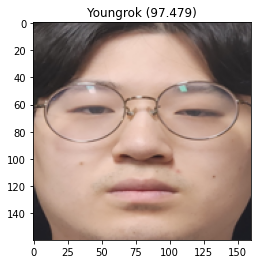

In [25]:
# develop a classifier for the Faces Dataset
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot

# load faces
data = load('face_recognition_project.npz')
testX_faces = data['arr_2']

# load face embeddings
data = load('face_recognition_project.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# Flatten the images
trainX = trainX.reshape((trainX.shape[0], -1))
testX = testX.reshape((testX.shape[0], -1)) 

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# test model on a random example from the test dataset
# 테스트 세트에서 임의의 예를 선택한 다음 임베딩, 얼굴 픽셀, 예상 클래스 예측 및 해당 클래스 이름을 가져옴
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face 클래스 정수와 예측 확률
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name 예측된 클래스 정수의 이름과 이 예측의 확률을 얻을 수 있다.
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])

# plot for fun 예측된 이름 및 확률과 함께 얼굴 픽셀을 그린다.
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2

image = cv2.imread("C:\\Users\\admin\\Desktop\\K.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

(x,y),(w,h) = (180, 37), (15, 10)                   # 좌표는 x, y
roi_img = image[y:y+h, x:x+w]                   # 행렬 접근은 y, x

#print(“[roi_img] =\n”, roi_img) # 행렬 원소 바로 출력 가능

print("[roi_img] =")
for row in roi_img:
    for p in row:
        print("%4d" % p, end="")       # 행렬 원 하나 출력
    print()

cv2.rectangle(image, (x,y, w,h), 255, 1)
cv2.imshow("image", image)
cv2.waitKey(0)

[roi_img] =
 216 215 216 216 217 217 217 217 216 215 215 214 213 214 214
 216 216 216 217 217 217 216 215 215 214 214 214 213 213 213
 217 216 217 217 216 216 215 214 214 213 214 214 213 213 213
 217 216 215 215 216 216 215 214 213 213 215 216 216 215 214
 217 217 217 216 216 215 214 213 213 214 215 216 215 214 214
 217 217 217 218 216 215 213 213 214 215 215 215 213 213 213
 215 216 217 217 217 215 213 213 215 216 215 213 212 212 213
 215 216 217 217 218 216 214 213 215 215 214 212 212 213 213
 217 217 217 218 217 216 214 214 215 215 214 213 213 213 213
 217 217 217 216 215 215 215 215 215 215 214 214 213 213 213


-1

In [6]:
import cv2

image = cv2.imread("C:\\Users\\admin\\Desktop\\K.jpg", cv2.IMREAD_GRAYSCALE)    # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

# OpenCV 함수 이용
dst1 = cv2.add(image, 200)                  # 영상 밝게 saturation 방식
dst2 = cv2.subtract(image, 200)             # 영상 어둡게

# numpy array 이용
dst3 = image + 100                          # 영상 밝게 modulo 방식
dst4 = image - 100                          # 영상 어둡게

cv2.imshow("original image", image)
cv2.imshow("dst1- bright: OpenCV", dst1)
cv2.imshow("dst2- dark: OpenCV", dst2)
cv2.imshow("dst3- bright: numpy", dst3)
cv2.imshow("dst4- dark: numpy", dst4);
cv2.waitKey(0)



-1

In [11]:
import numpy as np, cv2

image1_path = r"C:\Users\admin\Desktop\face_recognition_project\image\add1.jpg"
image2_path = r"C:\Users\admin\Desktop\face_recognition_project\image\add2.jpg"

image1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)   # Read image 1
image2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)   # Read image 2

if image1 is None or image2 is None: raise Exception("영상 파일 읽기 오류 발생")

# 영상 합성
alpha, beta = 0.6, 0.7                                        # 곱샘 비율
add_img1 = cv2.add(image1 , image2)                            # 두 영상 단순 더하기
add_img2 = cv2.add(image1 * alpha , image2 * beta)             # 두영상 비율에 따른 더하기
add_img2 = np.clip(add_img2, 0, 255).astype("uint8")           # saturation 처리
add_img3 = cv2.addWeighted(image1, alpha, image2, beta, 0)     # 두영상 비율에 따른 더하기

titles = ['image1','image2','add_img1','add_img2','add_img3']
for t in titles: cv2.imshow(t, eval(t))
cv2.waitKey(0)


-1

In [13]:
import numpy as np, cv2

image = cv2.imread("C:\\Users\\admin\\Desktop\\face_recognition_project\\image\\P1.JPG", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류 발생")

noimage = np.zeros(image.shape[:2], image.dtype)        # 더미 영상
avg = cv2.mean(image)[0]/2.0                            # 영상 화소 평균의 절반

dst1 = cv2.scaleAdd(image, 0.2, noimage) + 20               # 영상대비 감소
dst2 = cv2.scaleAdd(image, 2.0, noimage)                # 영상대비 증가
dst3 = cv2.addWeighted(image, 0.5, noimage, 0, avg)     # 명암대비 감소
dst4 = cv2.addWeighted(image, 2.0, noimage, 0,-avg)     # 명암대비 증가

# 영상 띄우기
cv2.imshow("image", image)
cv2.imshow("dst1 - decrease contrast", dst1)
cv2.imshow("dst2 - increase contrast", dst2)
cv2.imshow("dst3 - decrease contrast using average", dst3)
cv2.imshow("dst4 - increase contrast using average", dst4)

cv2.imwrite("dst.jpg",dst1)
cv2.waitKey(0)




-1

In [20]:
import numpy as np, cv2

def calc_histo(image, hsize, ranges=[0, 256]):  # 행렬 원소의 1차원 히스토그램 계산
    hist = np.zeros((hsize, 1), np.float32)  # 히스토그램 누적 행렬
    gap = ranges[1]/hsize  # 계급 간격

    for i in (image/gap).flat:
        hist[int(i)] += 1
    return hist

image = cv2.imread(r"C:\Users\admin\Desktop\face_recognition_project\image\B.jpg", cv2.IMREAD_COLOR)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류 발생")

hsize, ranges = [32], [0, 256]  # 히스토그램 간격수, 값 범위
hist = calc_histo(image, hsize[0], ranges)  # 사용자 정의 히스토그램 계산

print("사용자 정의 함수: \n", hist.flatten())  # 행렬을 벡터로 변환하여 출력
cv2.imshow("image", image)
cv2.waitKey(0)

사용자 정의 함수: 
 [1.20000e+02 1.24400e+03 2.41200e+04 6.09800e+04 9.13870e+04 1.23673e+05
 1.44130e+05 1.81328e+05 1.57063e+05 1.11328e+05 7.60850e+04 3.60010e+04
 3.52030e+04 5.66160e+04 9.43160e+04 1.54077e+05 1.81238e+05 1.48666e+05
 1.35160e+05 1.43407e+05 1.73569e+05 1.25716e+05 8.91780e+04 9.91460e+04
 1.09407e+05 1.24305e+05 4.31220e+04 4.13360e+04 2.53700e+03 2.37000e+02
 7.50000e+01 3.00000e+01]


-1

In [21]:
import numpy as np, cv2

def calc_histo(image, hsize, ranges=[0, 256]):  # 행렬 원소의 1차원 히스토그램 계산
    hist = np.zeros((hsize, 1), np.float32)  # 히스토그램 누적 행렬
    gap = ranges[1]/hsize  # 계급 간격

    for i in (image/gap).flat:
        hist[int(i)] += 1
    return hist



image = cv2.imread("C:\\Users\\admin\\Desktop\\face_recognition_project\\dataset\\train\\Hayden\\test.jpg", cv2.IMREAD_COLOR) # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류 발생")

hsize, ranges = [32], [0, 256]                  # 히스토그램 간격수, 값 범위
gap = ranges[1]/hsize[0]
ranges_gap  = np.arange(0, ranges[1]+1, gap)
hist1 = calc_histo(image, hsize[0], ranges)  # User 함수
hist2 = cv2.calcHist([image], [0], None, hsize, ranges)  # OpenCV 함수
hist3, bins = np.histogram(image, ranges_gap )

print("User 함수: \n", hist1.flatten())                # 행렬을 벡터로 변환하여 출력
print("OpenCV 함수: \n", hist2.flatten())                # 행렬을 벡터로 변환하여 출력
print("numpy 함수: \n", hist3)                           # 행렬을 벡터로 변환하여 출력

cv2.imshow("image", image)
cv2.waitKey(0)

User 함수: 
 [259994. 108985.  73736.  71535.  78549.  64910.  94473. 112641. 108392.
  94540.  87328.  72061.  58334.  56899.  67878.  83433. 148690. 196449.
 224360. 273052. 329225. 322674. 345147. 396572. 201078. 148999. 158895.
 169115. 145503.  79855.  25496.   6802.]
OpenCV 함수: 
 [ 73911.  53899.  35627.  31508.  32595.  19450.  16488.  16598.  22263.
  40770.  58178.  47828.  38463.  37070.  45382.  54903. 105504. 126304.
 122000. 137843. 123691.  45066.  20331.  21193.  30478.  46016.  50158.
  48264.  35285.  13728.   3401.   1005.]
numpy 함수: 
 [259994 108985  73736  71535  78549  64910  94473 112641 108392  94540
  87328  72061  58334  56899  67878  83433 148690 196449 224360 273052
 329225 322674 345147 396572 201078 148999 158895 169115 145503  79855
  25496   6802]


-1

In [22]:
import numpy as np, cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 150, -1)
        cv2.rectangle(hist_img, roi, 0, 1)

    return   cv2.flip(hist_img, 0)                        # 영상 상하 뒤집기 후 반환

image = cv2.imread(r"C:\Users\admin\Desktop\face_recognition_project\dataset\train\Hayden\test.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")
    
hist = cv2.calcHist([image], [0], None, [32], [0, 256])
hist_img = draw_histo(hist)

cv2.imshow("image", image)
cv2.imshow("hist_img", hist_img)
cv2.waitKey(0)

KeyboardInterrupt: 